# Assignment: Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

```{admonition} Learning Goals
:class: tip

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npy` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making scatterplots
- Annotating plots with titles and axes
```

## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import math

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [95]:
x = np.linspace(-2,2,100)  # np.linspace(start, stop, num)
y = np.linspace(-2, 2, 100) 

xx, yy = np.meshgrid(x, y)

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes.

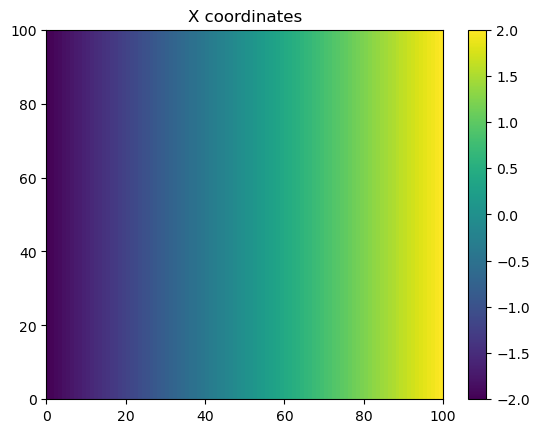

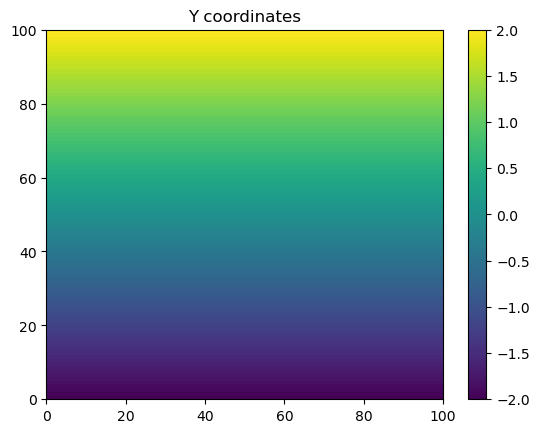

In [96]:
plt.pcolormesh(xx)
plt.colorbar()
plt.title("X coordinates")
plt.show()

plt.pcolormesh(yy)
plt.colorbar()
plt.title("Y coordinates")
plt.show()

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [97]:
r = np.sqrt(xx**2 + yy**2)
phi = np.arctan2(yy,xx)

### 1.4. Visualize $r$ and $\varphi$ on the 2D  $x$ / $y$ plane using `pcolormesh`

<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1005/3561817920.py:13: SyntaxWarning: invalid escape sequence '\p'
  plt.title("$\phi$ coordinates")


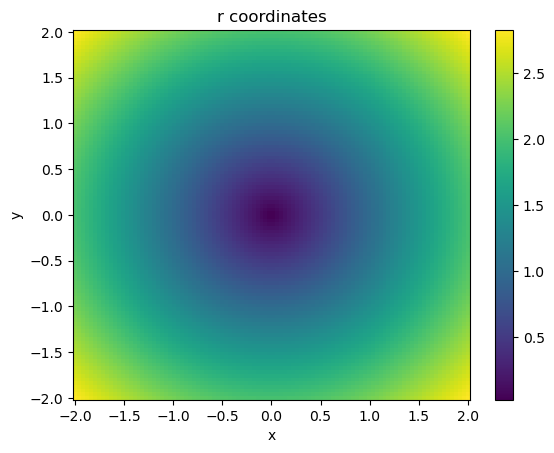

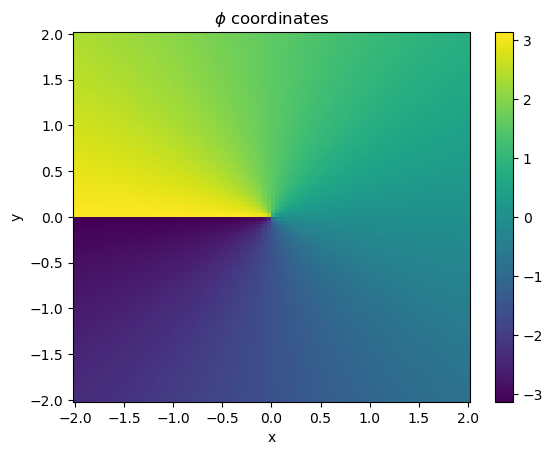

In [98]:
plt.figure()
plt.pcolormesh(xx, yy, r) 
plt.colorbar()
plt.title("r coordinates")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Visualize phi
plt.figure()
plt.pcolormesh(xx, yy, phi)
plt.colorbar()
plt.title("$\phi$ coordinates")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 1.5 Caclulate the quanity $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it on the x$ / $y$ plane

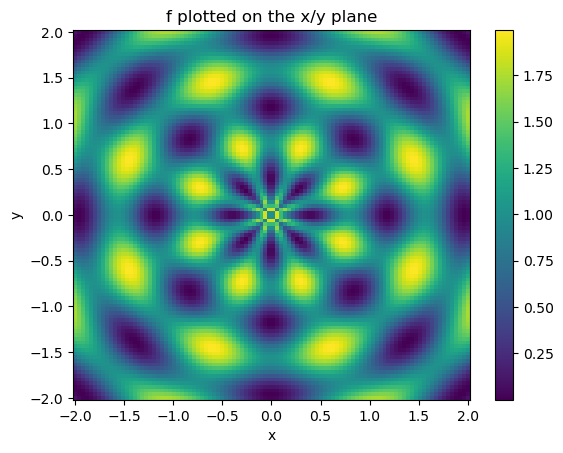

In [99]:
f = (np.cos(4 * r) **2) + (np.sin (4 * phi ) ** 2)
plt.pcolormesh(x,y,f)
plt.colorbar()
plt.title("f plotted on the x/y plane")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

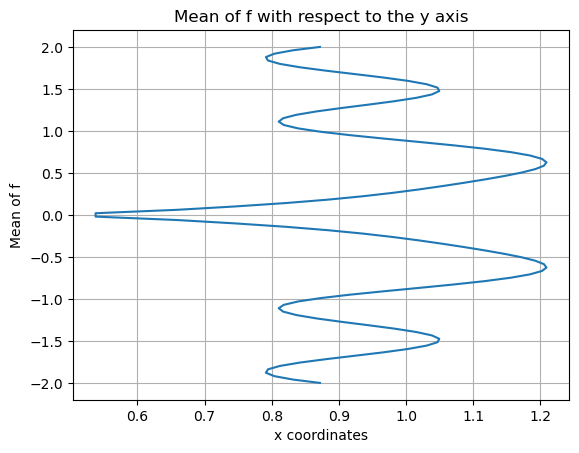

In [102]:
meanx = np.mean(f, axis=0)

plt.figure()
plt.plot(meany, x) 
plt.title("Mean of f with respect to the y axis")
plt.xlabel("x coordinates")
plt.ylabel("Mean of f")
plt.grid(True)
plt.show()

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

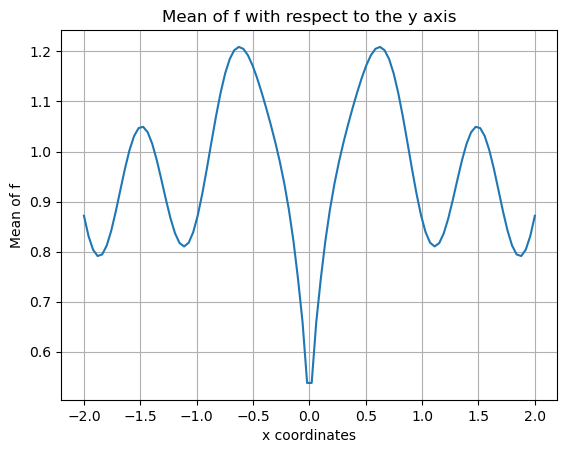

In [103]:
meany = np.mean(f, axis=1)

plt.figure()
plt.plot(x, meany)  
plt.title("Mean of f with respect to the y axis")
plt.xlabel("x coordinates")
plt.ylabel("Mean of f")
plt.grid(True)
plt.show()

### 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1005/1733256274.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Mean of with respect to $\phi$ as a function of r")


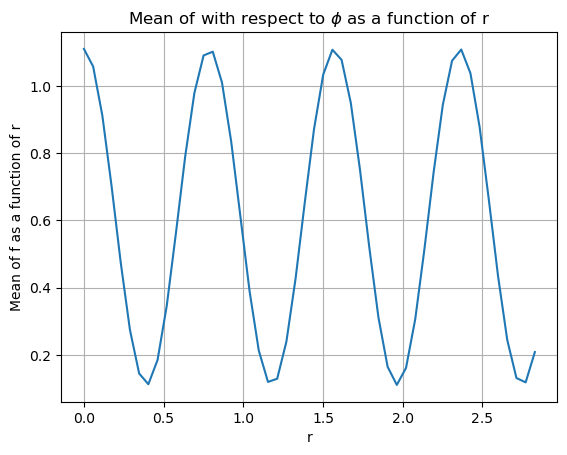

In [105]:
r_bins = np.linspace(0, np.max(r), 50)

phi_bins = np.linspace (-np.pi, np.pi, 100)

#f_value = (np.cos(4 * r) **2) + (np.sin (4 * phi ) ** 2)
f_value = (np.cos(4*r_bins[:, None])**2) + np.sin(4*phi_bins[None,:]**2)
f_mean = np.mean(f_value, axis=1)

plt.figure()
plt.plot(r_bins, f_mean)
plt.title("Mean of with respect to $\phi$ as a function of r")
plt.xlabel("r")
plt.ylabel("Mean of f as a function of r")
plt.grid(True)
plt.show()

## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu) Data

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise.
The following code will give you a list of `.npy` files that you can open in the next step.

In [106]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy']

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [107]:
print(files)

# get indicies from printed files
T = np.load(files[3])  
S = np.load(files[4])  
P = np.load(files[5])  
date = np.load(files[0]) 
lat = np.load(files[2])  
lon = np.load(files[1])  
level = np.load(files[6])  

print(level)

['/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy', '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy', '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy', '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy', '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy', '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy', '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [108]:
# Optional: Check the shapes and types of the loaded arrays
print("Temperature shape:", T.shape)
print("Salinity shape:", S.shape)
print("Pressure shape:", P.shape)
print("Date shape:", date.shape)
print("Latitude shape:", lat.shape)
print("Longitude shape:", lon.shape)
print("Depth level shape:", level.shape)

print("Based on the shapes, I think temperature, salinity, pressure share dimensions/information with depth because they share the shape 78. I speculate that date also shares data/dimensions with the other variables because they share the shape 75. I think that latitude and longitude share dimensions/information.")

Temperature shape: (78, 75)
Salinity shape: (78, 75)
Pressure shape: (78, 75)
Date shape: (75,)
Latitude shape: (75,)
Longitude shape: (75,)
Depth level shape: (78,)
Based on the shapes, I think temperature, salinity, pressure share dimensions/information with depth. I speculate that date also shares data/dimensions with the other variables. I think that latitude and longitude share dimensions/information.


### 2.3 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Each plot should have a line for each column of data. It will look messy.

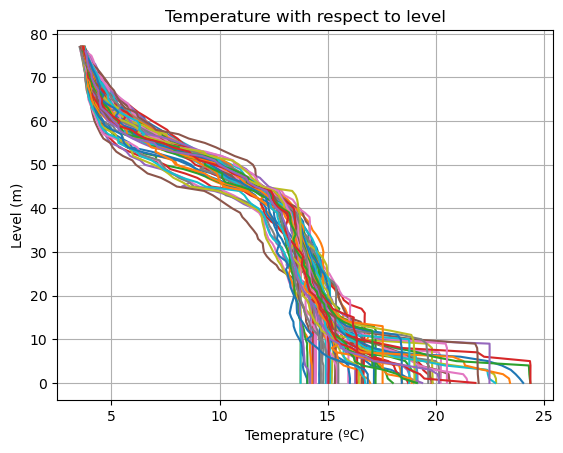

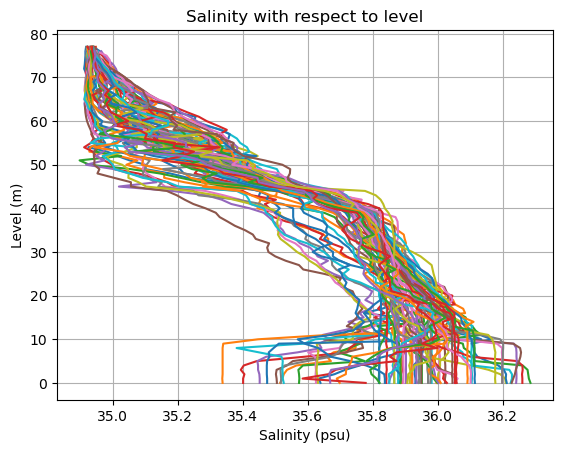

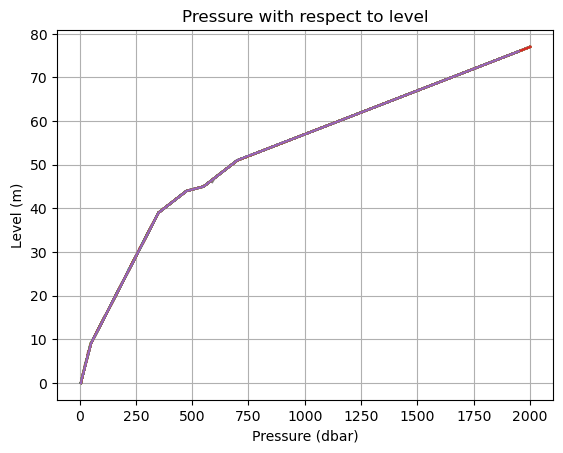

In [79]:
plt.figure()
plt.plot(T, level)
plt.title("Temperature with respect to level")
plt.xlabel("Temeprature (ºC)")
plt.ylabel("Level (m)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(S, level)
plt.title("Salinity with respect to level")
plt.xlabel("Salinity (psu)")
plt.ylabel("Level (m)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(P, level)
plt.title("Pressure with respect to level")
plt.xlabel("Pressure (dbar)")
plt.ylabel("Level (m)")
plt.grid(True)
plt.show()

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [80]:
# Compute the mean and standard deviation for each depth level
mean_T = np.mean(T, axis=1)
std_T = np.std(T, axis=1)

mean_S = np.mean(S, axis=1)
std_S = np.std(S, axis=1)

mean_P = np.mean(P, axis=1)
std_P = np.std(P, axis=1)

print(mean_T.shape)# - do mean overtime dimension- mean over levels 

# Optionally, you can print the results to check
print("Mean Temperature at each level:", mean_T)
print("Standard Deviation of Temperature at each level:", std_T)

print("Mean Salinity at each level:", mean_S)
print("Standard Deviation of Salinity at each level:", std_S)

print("Mean Pressure at each level:", mean_P)
print("Standard Deviation of Pressure at each level:", std_P)

(78,)
Mean Temperature at each level: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
Standard Deviat

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 


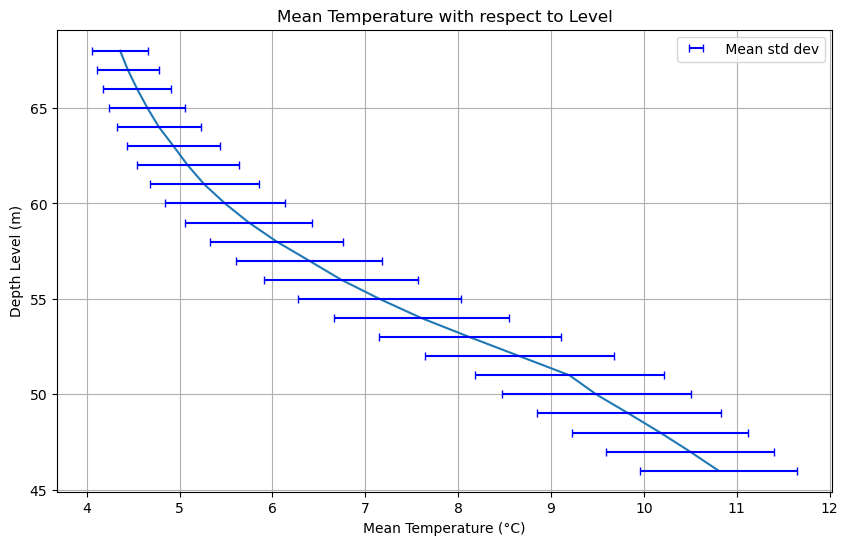

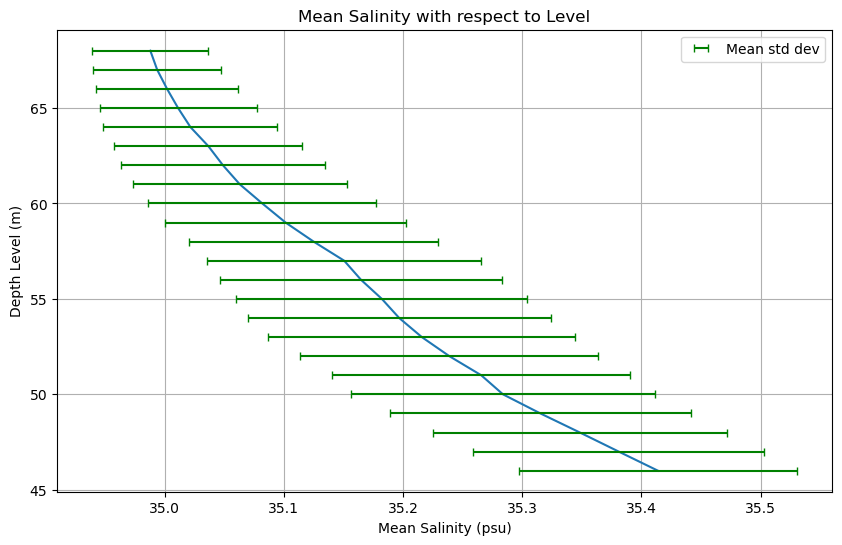

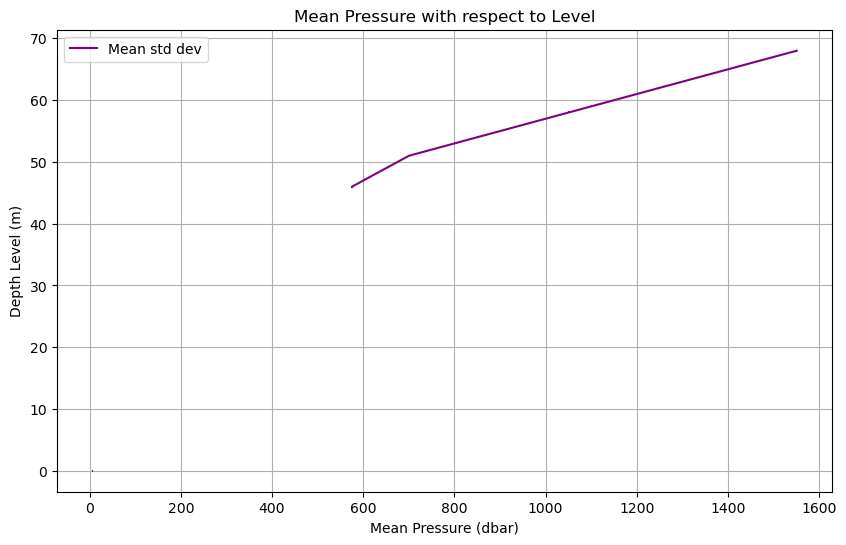

In [81]:
# Plot Mean Temperature with error bars

plt.figure(figsize=(10, 6))
plt.plot(mean_T, level)
plt.errorbar(mean_T, level, xerr=std_T, fmt='none', capsize=3, color='blue', label=' Mean std dev')
plt.title("Mean Temperature with respect to Level")
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Depth Level (m)")
plt.grid(True)
plt.legend()
plt.show()

#print(np.shape(level))

# Plot Mean Salinity with error bars
plt.figure(figsize=(10, 6))
plt.plot(mean_S, level)
plt.errorbar(mean_S, level, xerr=std_S, fmt='none', capsize=3, color='green', label='Mean std dev')
plt.title("Mean Salinity with respect to Level")
plt.xlabel("Mean Salinity (psu)")
plt.ylabel("Depth Level (m)")
plt.grid(True)
plt.legend()
plt.show()

## VALUES FROM 0-45 AND BEYOND ARE NAN

# Plot Mean Pressure with error bars
plt.figure(figsize=(10, 6))
#plt.plot(mean_P, level)
plt.errorbar(mean_P, level, xerr=std_P, color='purple', label='Mean std dev')
plt.title("Mean Pressure with respect to Level")
plt.xlabel("Mean Pressure (dbar)")
plt.ylabel("Depth Level (m)")
plt.grid(True)
plt.legend()
plt.show()

### 2.6 Account For Missing Data

The profiles contain many missing values. These are indicated by the special "Not a Number" value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

In [82]:
mean_T = np.nanmean(T, axis = 1)
std_T = np.nanstd(T, axis=1) # axis = 0 (across rows) while axis = 1 (across columns)

mean_S = np.nanmean(S, axis=1)
std_S = np.nanstd(S, axis=1)

mean_P = np.nanmean(P, axis=1)
std_P = np.nanstd(P, axis=1)

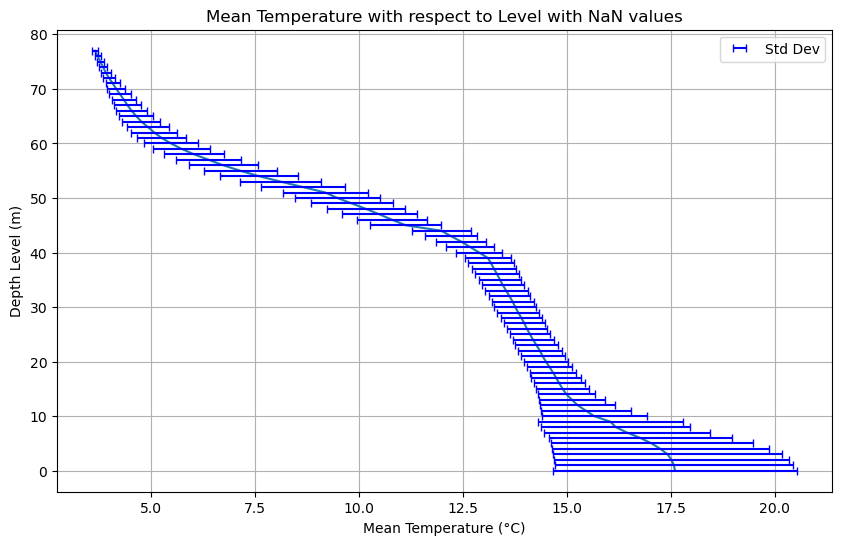

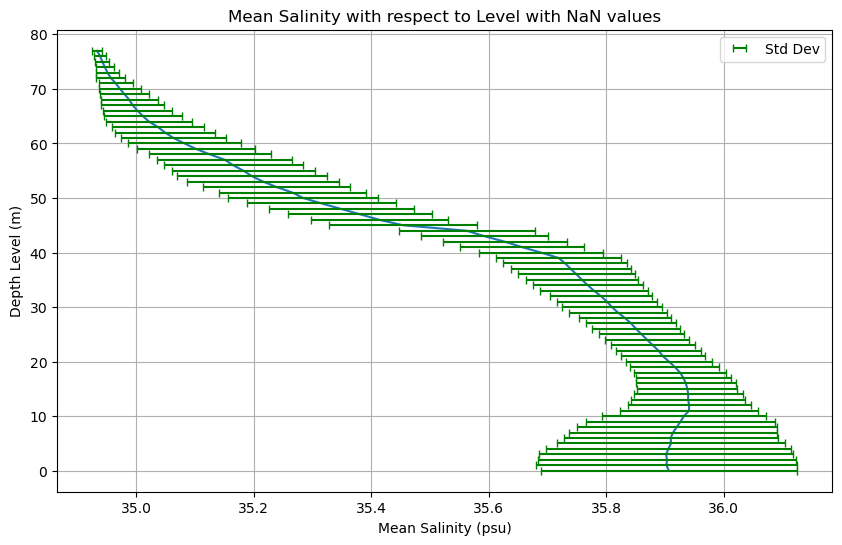

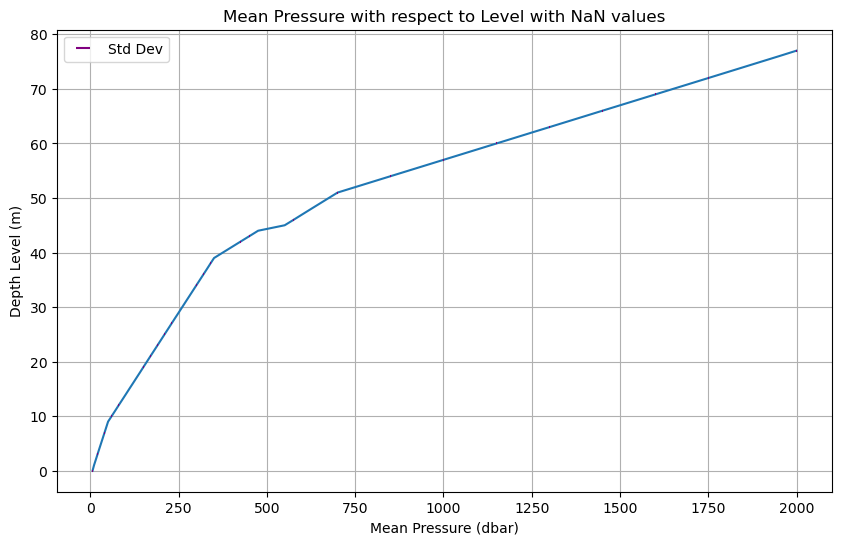

In [83]:
# Plot Mean Temperature with error bars

plt.figure(figsize=(10, 6))
plt.plot(mean_T, level)
plt.errorbar(mean_T, level, xerr=std_T, fmt='none', capsize=3, color='blue', label='Std Dev')
plt.title("Mean Temperature with respect to Level with NaN values")
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Depth Level (m)")
plt.grid(True)
plt.legend()
plt.show()

#print(np.shape(level))

# Plot Mean Salinity with error bars
plt.figure(figsize=(10, 6))
plt.plot(mean_S, level)
plt.errorbar(mean_S, level, xerr=std_S, fmt='none', capsize=3, color='green', label='Std Dev')
plt.title("Mean Salinity with respect to Level with NaN values")
plt.xlabel("Mean Salinity (psu)")
plt.ylabel("Depth Level (m)")
plt.grid(True)
plt.legend()
plt.show()

## VALUES FROM 0-45 AND BEYOND ARE NAN

# Plot Mean Pressure with error bars
plt.figure(figsize=(10, 6))
plt.plot(mean_P, level)
plt.errorbar(mean_P, level, xerr=std_P, fmt='none', color='purple', label='Std Dev')
plt.title("Mean Pressure with respect to Level with NaN values")
plt.xlabel("Mean Pressure (dbar)")
plt.ylabel("Depth Level (m)")
plt.grid(True)
plt.legend()
plt.show()

### 2.7 Create a scatter plot of the `lon`, `lat` positions of the ARGO float.

Use the [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

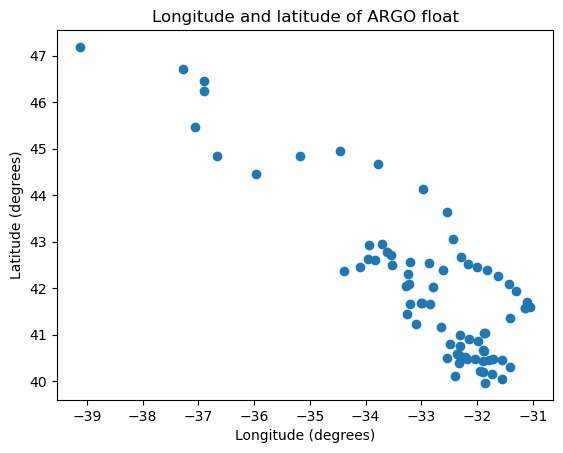

In [84]:
plt.scatter(lon,lat)
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.title("Longitude and latitude of ARGO float")
plt.show()